<a href="https://colab.research.google.com/github/Nancy123a/mall_customer_segmentation/blob/main/mall_customer_segmenation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clustering:

- Clustering aims to discover natural groups within an unlablled dataset.
- It is used for: Customer segmentation (for efficient marketing), image segmentation, documents clusterisation.
- There are many clustering algorithms which can be divided into two main types: hierarchical and partitional.
  - Hierarchial algorithms recursively split a dataset into a smaller subset until a subset contains only one item. This can be represented with a dendrogram which looks like a tree. It can be constructed from leaves to the roo(agglomerative approach) or from the root down to the leaves (divisive approach). You only have to define a termination condition for splitting/merging process
  - Partitional algorithms divide a dataset into several subsets (clusters) based on a given criteria. For some algorithms number of clusters has to be defined a priori (e.g K-Means) and for some not (DBSCAN).  

Choosing the best one depends on the database itself, an application domain and client requirements and expectations.

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

mall_data = pd.read_csv('sample_data/Mall_Customers.csv')

print('There are {} rows and {} columns in our dataset.'.format(mall_data.shape[0],mall_data.shape[1]))

There are 200 rows and 5 columns in our dataset.


In [24]:
mall_data.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
170,171,Male,40,87,13
175,176,Female,30,88,86
183,184,Female,29,98,88
88,89,Female,34,58,60
44,45,Female,49,39,28
19,20,Female,35,23,98
15,16,Male,22,20,79
116,117,Female,63,65,43
185,186,Male,30,99,97
145,146,Male,28,77,97


In [ ]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


There are 5 columns:

- Customer ID - numerical - unique customer number - integer
- Gender - categorical - binary (Male/Female)
- Age - numerical - integer
- Annual Income (k$) - numerical - integer
- Spending Score (1-100) - numerical - integer

In [ ]:
mall_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


There are no missing data.

## Explanatory Data Analysis:

<ipython-input-44-90e711b08c1a>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
<ipython-input-44-90e711b08c1a>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(females_age, bins=age_bins, 

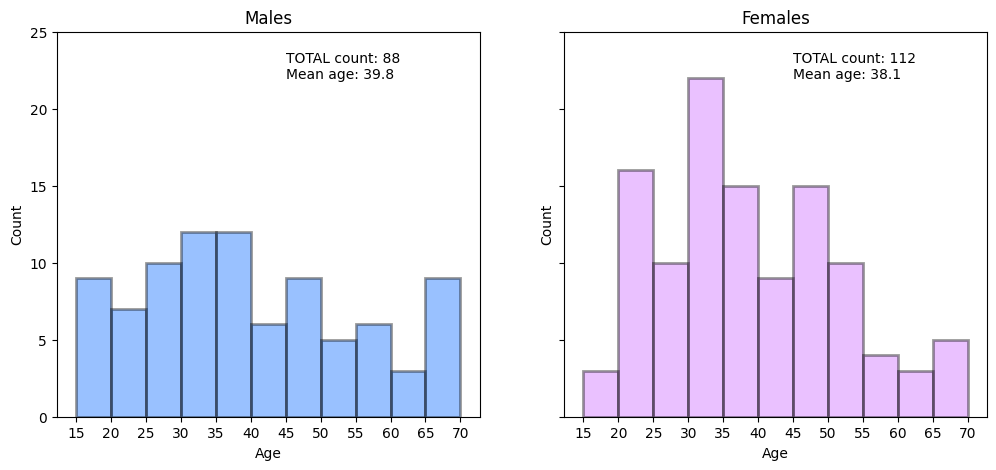

In [44]:
males_age = mall_data[mall_data['Gender']=='Male']['Age'] # subset with males age
females_age = mall_data[mall_data['Gender']=='Female']['Age'] # subset with females age

age_bins = range(15,75,5)

# males histogram
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.distplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45,23, "TOTAL count: {}".format(males_age.count()))
ax1.text(45,22, "Mean age: {:.1f}".format(males_age.mean()))

# females histogram
sns.distplot(females_age, bins=age_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45,23, "TOTAL count: {}".format(females_age.count()))
ax2.text(45,22, "Mean age: {:.1f}".format(females_age.mean()))

plt.show()

The average age of male customers is lightly higher than female ones (39.8 versus 38.1). Distribution of male age is more uniform than females, where we can observe that the biggest age group is 30-35 years old.

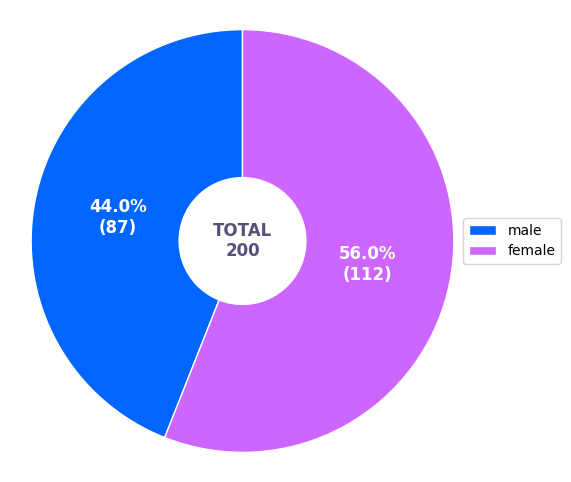

In [45]:
def labeler(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

sizes = [males_age.count(),females_age.count()] # wedge sizes

fig0, ax1 = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax1.pie(sizes,
                                   autopct=lambda pct: labeler(pct, sizes),
                                   radius=1,
                                   colors=['#0066ff','#cc66ff'],
                                   startangle=90,
                                   textprops=dict(color="w"),
                                   wedgeprops=dict(width=0.7, edgecolor='w'))

ax1.legend(wedges, ['male','female'],
           loc='center right',
           bbox_to_anchor=(0.7, 0, 0.5, 1))

plt.text(0,0, 'TOTAL\n{}'.format(mall_data['Age'].count()),
         weight='bold', size=12, color='#52527a',
         ha='center', va='center')

plt.setp(autotexts, size=12, weight='bold')
ax1.axis('equal')  # Equal aspect ratio
plt.show()


There are slightly more female customers than male ones (112 vs. 87). Females are 56% of total customers.

<ipython-input-46-0d86fc4a2b23>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(males_income, bins=my_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
<ipython-input-46-0d86fc4a2b23>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(females_income, bins=my_bi

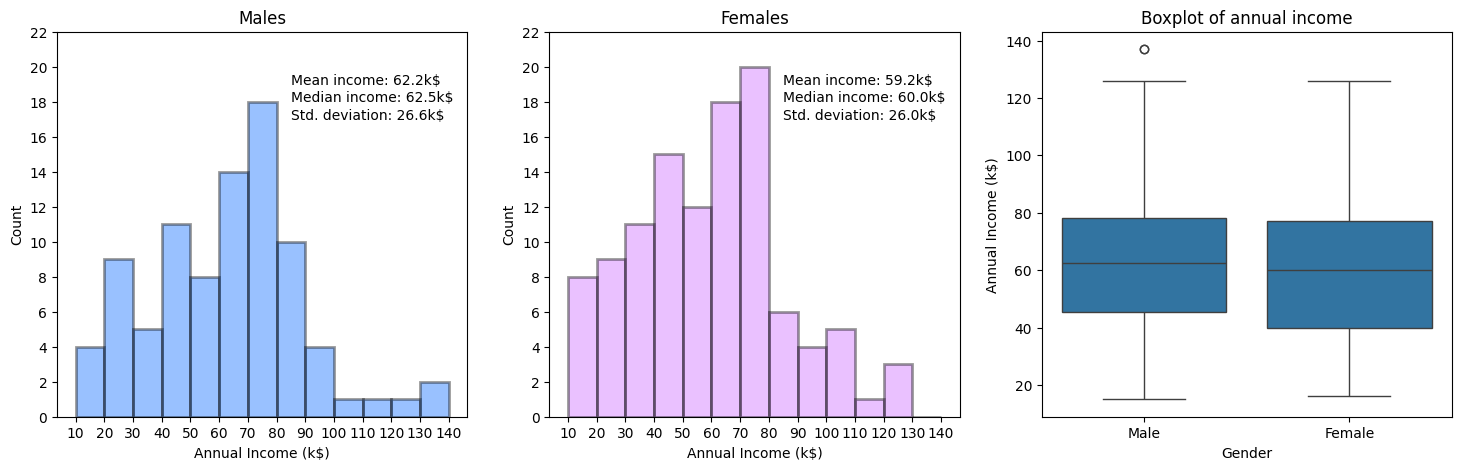

In [46]:
males_income = mall_data[mall_data['Gender']=='Male']['Annual Income (k$)'] # subset with males income
females_income = mall_data[mall_data['Gender']=='Female']['Annual Income (k$)'] # subset with females income

my_bins = range(10,150,10)

# males histogram
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
sns.distplot(males_income, bins=my_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(my_bins)
ax1.set_yticks(range(0,24,2))
ax1.set_ylim(0,22)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(85,19, "Mean income: {:.1f}k$".format(males_income.mean()))
ax1.text(85,18, "Median income: {:.1f}k$".format(males_income.median()))
ax1.text(85,17, "Std. deviation: {:.1f}k$".format(males_income.std()))

# females histogram
sns.distplot(females_income, bins=my_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(my_bins)
ax2.set_yticks(range(0,24,2))
ax2.set_ylim(0,22)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(85,19, "Mean income: {:.1f}k$".format(females_income.mean()))
ax2.text(85,18, "Median income: {:.1f}k$".format(females_income.median()))
ax2.text(85,17, "Std. deviation: {:.1f}k$".format(females_income.std()))

# boxplot
sns.boxplot(x='Gender', y='Annual Income (k$)', data=mall_data, ax=ax3)
ax3.set_title('Boxplot of annual income')
plt.show()

In [47]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_income, females_income)[1]))

Kolgomorov-Smirnov test p-value: 0.78


Mean income of males is higher than females (62.2 k$ vs. 59.2k\$). Also median income of male customers (62.5k$) is higher thn female ones (60k\$). Standard deviation is similar for both groups. There is one outlier in male group with an annual income of about 140k$. K-S test shows that these two groups are not statistically different.

<ipython-input-48-b207a174c10c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(males_spending, bins=spending_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
<ipython-input-48-b207a174c10c>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(females_spending, 

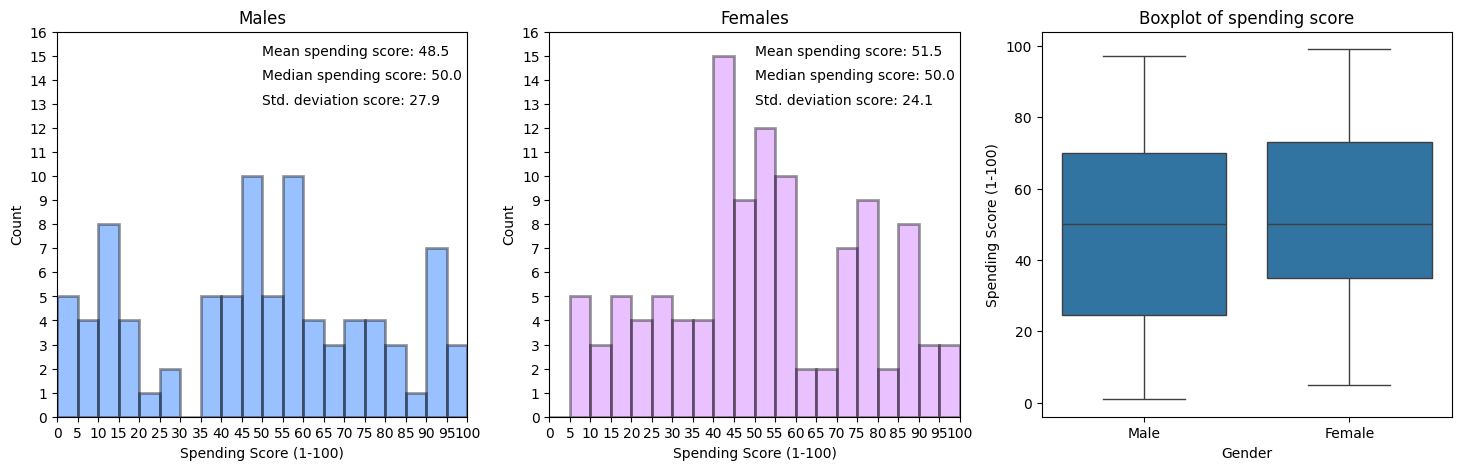

In [48]:
males_spending = mall_data[mall_data['Gender']=='Male']['Spending Score (1-100)'] # subset with males age
females_spending = mall_data[mall_data['Gender']=='Female']['Spending Score (1-100)'] # subset with females age
spending_bins = range(0,105,5)

# males histogram
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
sns.distplot(males_spending, bins=spending_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(spending_bins)
ax1.set_xlim(0,100)
ax1.set_yticks(range(0,17,1))
ax1.set_ylim(0,16)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(50,15, "Mean spending score: {:.1f}".format(males_spending.mean()))
ax1.text(50,14, "Median spending score: {:.1f}".format(males_spending.median()))
ax1.text(50,13, "Std. deviation score: {:.1f}".format(males_spending.std()))

# females histogram
sns.distplot(females_spending, bins=spending_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(spending_bins)
ax2.set_xlim(0,100)
ax2.set_yticks(range(0,17,1))
ax2.set_ylim(0,16)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(50,15, "Mean spending score: {:.1f}".format(females_spending.mean()))
ax2.text(50,14, "Median spending score: {:.1f}".format(females_spending.median()))
ax2.text(50,13, "Std. deviation score: {:.1f}".format(females_spending.std()))

# boxplot
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=mall_data, ax=ax3)
ax3.set_title('Boxplot of spending score')
plt.show()

plt.show()

A mean spending score for women (51.5) is higher than men (48.5). The K-S test p-value indicates that there is no evidence to reject the null-hypothesis, however the evidence is not so strong as in previous comparisons. Next I will calculate median income for all age groups.

In [49]:
medians_by_age_group = mall_data.groupby(["Gender",pd.cut(mall_data['Age'], age_bins)]).median()
medians_by_age_group.index = medians_by_age_group.index.set_names(['Gender', 'Age_group'])
medians_by_age_group.reset_index(inplace=True)

<ipython-input-49-982f56797b65>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians_by_age_group = mall_data.groupby(["Gender",pd.cut(mall_data['Age'], age_bins)]).median()


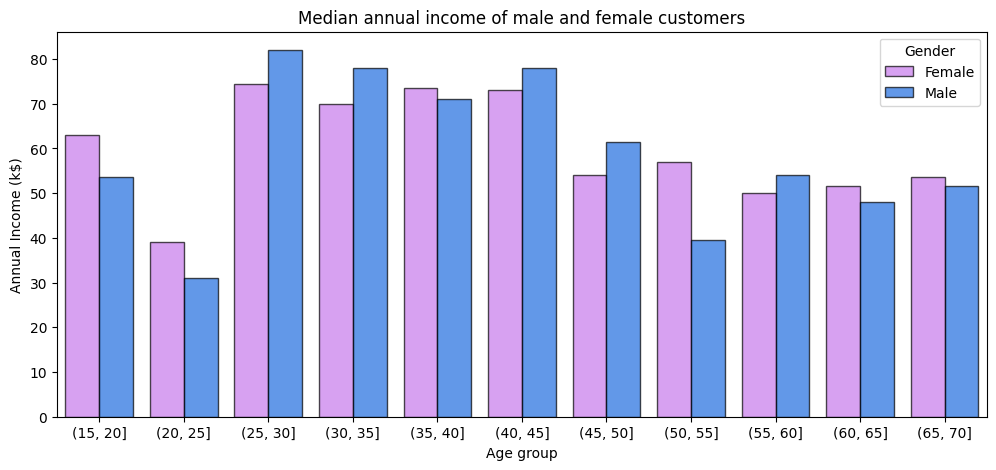

In [50]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x='Age_group', y='Annual Income (k$)', hue='Gender', data=medians_by_age_group,
            palette=['#cc66ff','#0066ff'],
            alpha=0.7,edgecolor='k',
            ax=ax)
ax.set_title('Median annual income of male and female customers')
ax.set_xlabel('Age group')
plt.show()

A bar chart above shows that the most wealthy customers are in age of 25-45 years old. The biggest difference between women and men is visible in age groups 25-30 (male more rich) and 50-55 (female more rich).

## Correlations:

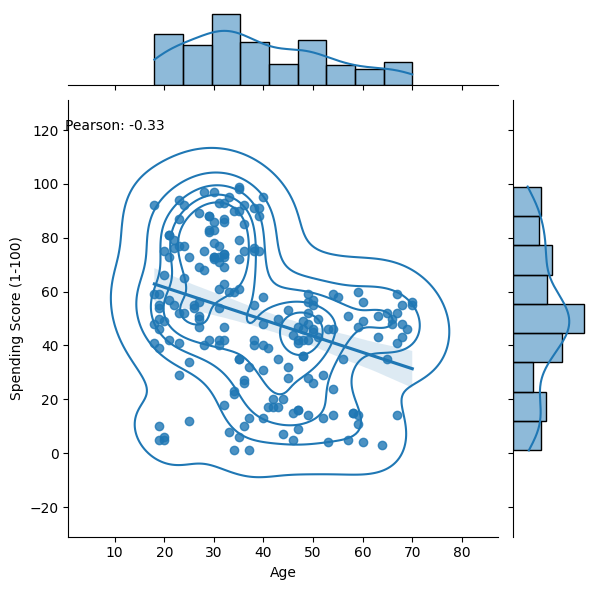

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Calculate Pearson's correlation
corr, _ = pearsonr(mall_data['Age'], mall_data['Spending Score (1-100)'])

# Create a jointplot with regression and KDE plot
jp = sns.jointplot(x='Age', y='Spending Score (1-100)', data=mall_data, kind='reg')
jp.plot_joint(sns.kdeplot, zorder=0, n_levels=6)

# Add Pearson's correlation text to the plot
plt.text(0, 120, 'Pearson: {:.2f}'.format(corr))

# Show the plot
plt.show()


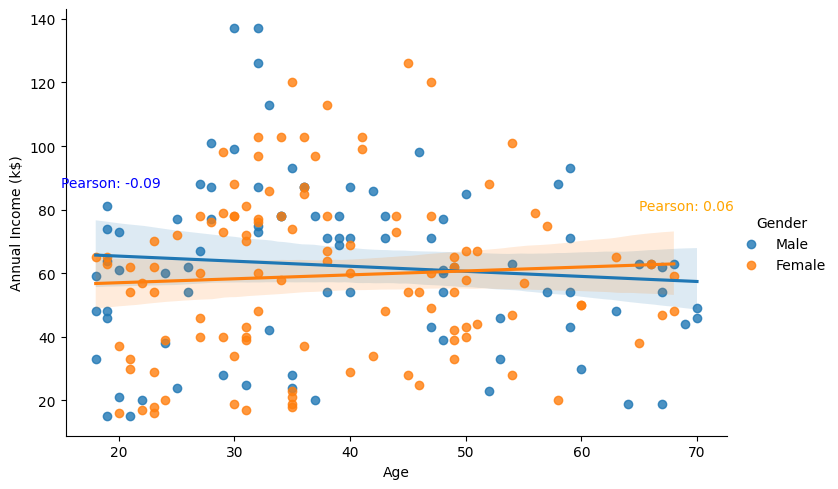

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Calculating Pearson's correlations
corr1, _ = pearsonr(males_age.values, males_income.values)
corr2, _ = pearsonr(females_age.values, females_income.values)

# Create a scatter plot with regression lines using lmplot
sns.lmplot(x='Age', y='Annual Income (k$)', data=mall_data, hue='Gender', aspect=1.5)

# Add Pearson's correlation text to the plot
plt.text(15, 87, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(65, 80, 'Pearson: {:.2f}'.format(corr2), color='orange')

# Show the plot
plt.show()


There is a negligible correlation between age and annual income of customers for both sex groups.

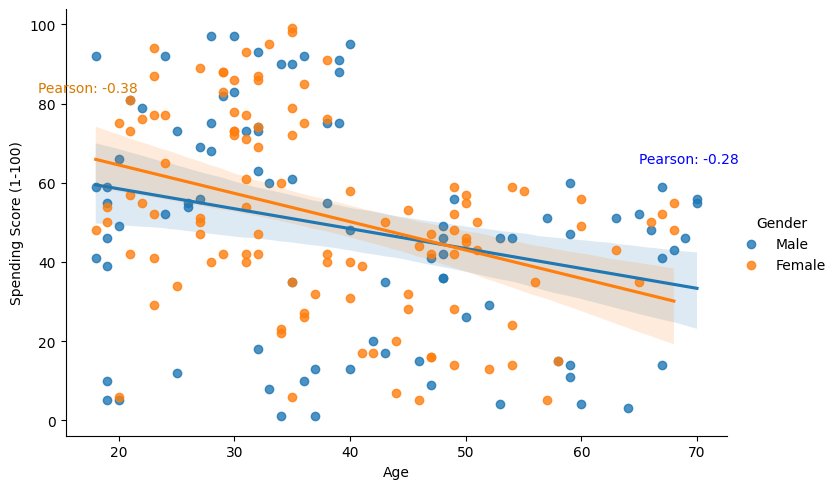

In [53]:
# calculating Pearson's correlations
corr1, _ = pearsonr(males_age.values, males_spending.values)
corr2, _ = pearsonr(females_age.values, females_spending.values)

sns.lmplot(x='Age', y='Spending Score (1-100)', data=mall_data, hue='Gender',aspect=1.5)

plt.text(65,65, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(13,83, 'Pearson: {:.2f}'.format(corr2), color='#d97900')

plt.show()

There are week negative correlations (<0.5) between age and spending score for both sex groups.

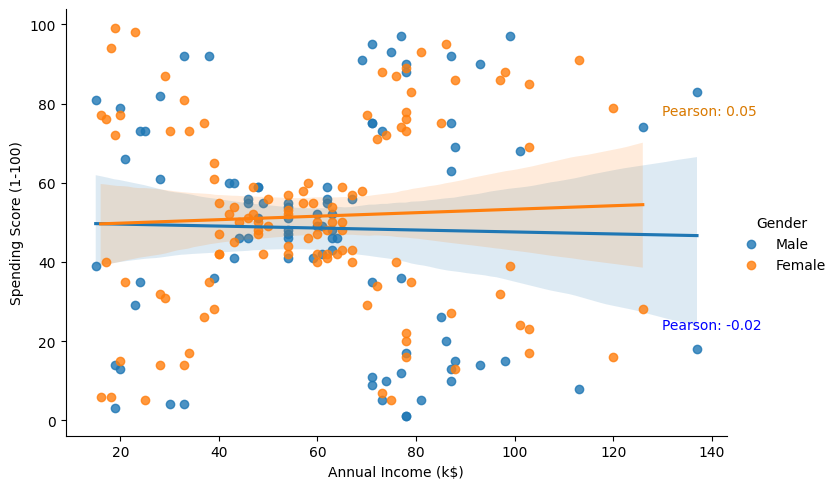

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Calculating Pearson's correlations
corr1, _ = pearsonr(males_income.values, males_spending.values)
corr2, _ = pearsonr(females_income.values, females_spending.values)

# Create a scatter plot with regression lines using lmplot
sns.lmplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=mall_data, hue='Gender', aspect=1.5)

# Add Pearson's correlation text to the plot
plt.text(130, 23, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(130, 77, 'Pearson: {:.2f}'.format(corr2), color='#d97900')

# Show the plot
plt.show()


There is a negligible correlation between annual income and spending score of customers for both sex groups.

## Clustering

This section of the notebook describes and demonstrates how to use three clustering algorithms:

- K-Means
- Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
- Affinity Propagation.

I will not standarize data for this case. When you should or should do it is nicely explained here on Data Science Stack Exchange.


4.1 K-Means:

This chapter focuses on a very popular K-Means algorithm being taught in most machine learning courses. The chapter contains two sub-chapters: description of the algorithm and a use case (mall customers segmentation).


4.1.1 Description:

The most well-known partitional clustering algorithm is K-Means. It was independently developed in many places in the 50s and 60s and gained great popularity because of its ease of implementation, simplicity and many empirical successes (e.g. in business, medicine and science).

There are 3 main steps in K-Means algorithm (known also as Lloyd’s algorithm):

- Split samples into initial groups by using seed points. The nearest samples to these seed point will create initial clusters.
- Calculate samples distances to groups’ central points (centroids) and assign the nearest samples to their cluster.
- The third step is to calculate newly created (updated) cluster centroids.

Then repeat steps 2 and 3 until the algorithm converges.

As mentioned earlier the goal of K-Means is to minimise the objective function (inertia) over all clusters. The objective function is defined as:

The objective function (inertia) for K-Means clustering is defined as the sum of the squared distances between each data point and the centroid of the cluster to which it belongs. Mathematically, it is expressed as:

$\text{Inertia} = \sum_{i=1}^{k} \sum_{x \in C_i} \| x - \mu_i \|^2$

Where:
- $k$ is the number of clusters.
- $C_i$ represents the $i^{th}$ cluster.
- $x$ is a data point in cluster $C_i$.
- $\mu_i$ is the centroid of cluster $C_i$.
- $| x - \mu_i |^2$ is the squared Euclidean distance between the data point $x$ and the centroid $\mu_i$.

The goal of the K-Means algorithm is to minimize this objective function, thereby finding the optimal set of clusters that best represent the data.

1. Initialisation criteria:

In scikit-learn, a clever initialisation scheme is implemented: “k-means++” proposed by Arthur and Vassilvitskii. It creates initial centroids generally distant from each other increasing probability of obtaining better results. There is also a possibility to use a random point’s generator.

2. Number of clusters:

Selecting a number of clusters is the most challenging part of setting this algorithm. There are no hard mathematical criteria for this and many heuristic/simplified approaches have been developed. One of the simplest and the most popular one is the elbow method shown in this analysis. Additionaly a silhouette score will be used as well. There are also other, often advanced, options for choosing the optimal number of clusters (however, not used in this notebook and not implemented in sklearn), e.g.:

- Minimum Message Length (MML) - more
- Minimum Description Length (MDL) - more
- Bayes Information Criterion (BIC) - more
- Akaike Information Criterion (AIC) - more
- Dirichlet Process
- Gap statistics

1. A distance metric (not required in scikit learn implementation):
There are various options to calculate the distance between points. The most popular one is simply the Euclidean metric and it is the one implemented in scikit-learn. It is often called spherical k-means model. It has a drawback that it finds spherical-like groups only and tends to become inflated in highly multi-dimensional analyses (“curse of dimensionality”). There are other options but not implemented in scikit-learn, e.g.:

- Mahalonobis distance (high computiational cost)
- Itakura-Saito distance
- L1 distance
- Cosine distance
- Bregman distance

There are numerous ongoing researches and variations proposed to K-Means, e.g.:
- K-Medoid where the centroid is defined as the most centrally located object)
- K-Median where the centroid is calculated using median instead of a mean,
- Fuzzy C-means model

Some take-aways about K-Means:

- Euclidean distances are used
- Number of clusters has to be defined for the algorithm
- Centroid is calculated using mean distance to cluster members
- Clusters are assumed isotropic and convex
- Stochastic algorithm – results depend on the initialisation criteria
- Creates groups of equal variance (minimises inertia)
- Prone to the “curse of dimensionality”
- Can be run in parallel – so it scales well

## Use case - customers segmentation

In [55]:
from sklearn.cluster import KMeans
## only numeric columns are used for clustering
X_numerics = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] # subset with numeric variables only

In order to find an appropriate number of clusters, the elbow method will be used. In this method for this case, the inertia for a number of clusters between 2 and 10 will be calculated. The rule is to choose the number of clusters where you see a kink or "an elbow" in the graph.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

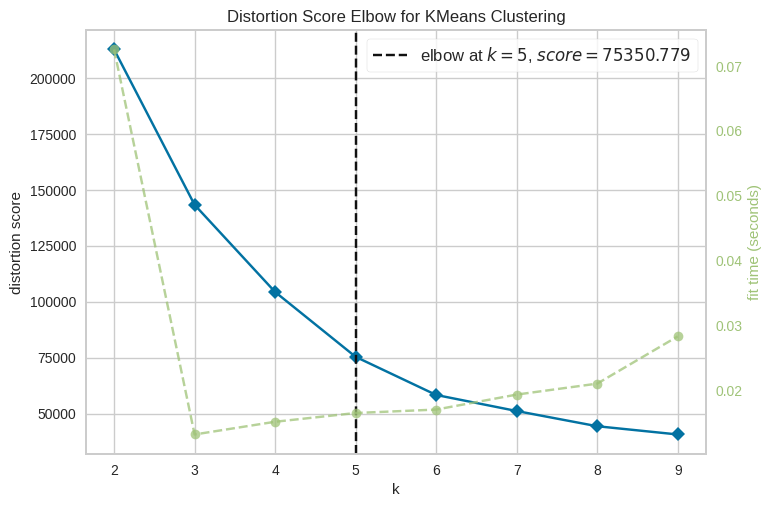

In [56]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

The graph above shows the reduction of a distortion score as the number of clusters increases. However, there is no clear "elbow" visible. The underlying algorithm suggests 5 clusters. A choice of 5 or 6 clusters seems to be fair.

Another way to choose the best number of clusters is to plot the silhuette score in a function of number of clusters. Let's see the results.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

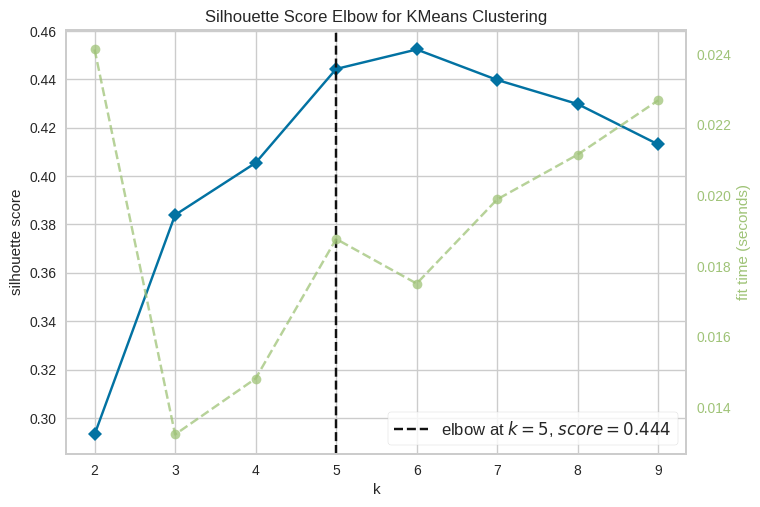

In [57]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

Silhouette score method indicates the best options would be 5 or 6 clusters. Let's compare both.

## 5 Clusters:

In [58]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # append labels to points

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [59]:
KM5_clustered

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,0
1,21,15,81,4
2,20,16,6,0
3,23,16,77,4
4,31,17,40,0
...,...,...,...,...
195,35,120,79,2
196,45,126,28,1
197,32,126,74,2
198,32,137,18,1


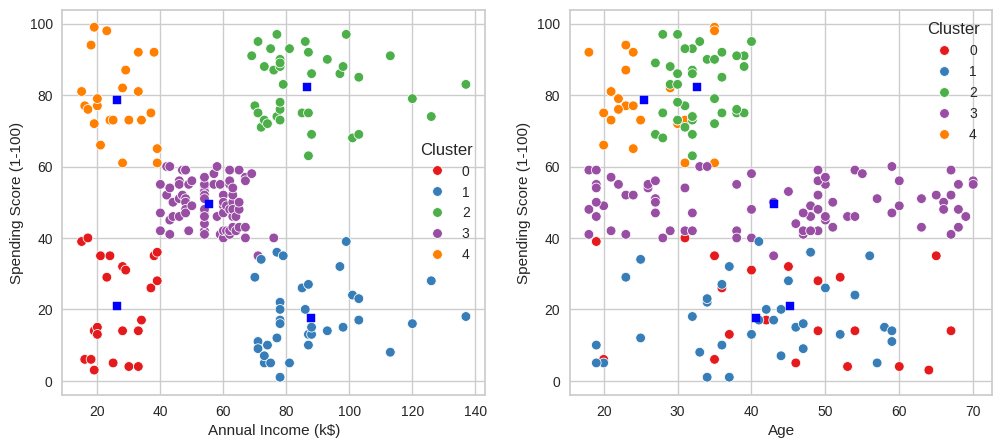

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig1, axes = plt.subplots(1, 2, figsize=(12, 5))

# First scatter plot with 'Annual Income (k$)' vs 'Spending Score (1-100)'
scat_1 = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=KM5_clustered,
                         hue='Cluster', ax=axes[0], palette='Set1', legend='full')

# Second scatter plot with 'Age' vs 'Spending Score (1-100)'
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

# Adding cluster centroids to the first plot
axes[0].scatter(KM_5_clusters.cluster_centers_[:, 1], KM_5_clusters.cluster_centers_[:, 2],
                marker='s', s=40, c="blue")

# Adding cluster centroids to the second plot
axes[1].scatter(KM_5_clusters.cluster_centers_[:, 0], KM_5_clusters.cluster_centers_[:, 2],
                marker='s', s=40, c="blue")



# Show the plot
plt.show()


K-Means algorithm generated the following 5 clusters:

- clients with low annual income and high spending score
- clients with medium annual income and medium spending score
- clients with high annual income and low spending score
- clients with high annual income and high spending score
- clients with low annual income and low spending score

There are no distinct groups is terms of customers age.

In [61]:
KM_clust_sizes = KM5_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

,KM_size
Cluster,
0,23
1,36
2,39
3,79
4,23


The biggest cluster is a cluster number 1 with 79 observations ("medium-medium" clients). There are two the smallest ones each containing 23 observations (cluster 3 "high-high" and cluster 0 "low-high" clients). Below there is a 3D projection of 5 generated clusters. It is not very helpful in terms of a visualisation in a static mode but if you run the code in an interactive environment (e.g. Spyder) you can rotate it!

In [62]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig, rect=[0, 0, .99, 1], elev=20, azim=210)
ax.scatter(KM5_clustered['Age'],
           KM5_clustered['Annual Income (k$)'],
           KM5_clustered['Spending Score (1-100)'],
           c=KM5_clustered['Cluster'],
           s=35, edgecolor='k', cmap=plt.cm.Set1)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D view of K-Means 5 clusters')
ax.dist = 12

plt.show()

<ipython-input-62-2aceea3e6f93>:11: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_ticklabels([])
<ipython-input-62-2aceea3e6f93>:12: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_ticklabels([])
<ipython-input-62-2aceea3e6f93>:13: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_ticklabels([])
<ipython-input-62-2aceea3e6f93>:18: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 12


<Figure size 700x700 with 0 Axes>

In [63]:
import plotly as py
import plotly.graph_objs as go

def tracer(db, n, name):
    '''
    This function returns trace object for Plotly
    '''
    return go.Scatter3d(
        x = db[db['Cluster']==n]['Age'],
        y = db[db['Cluster']==n]['Spending Score (1-100)'],
        z = db[db['Cluster']==n]['Annual Income (k$)'],
        mode = 'markers',
        name = name,
        marker = dict(
            size = 5
        )
     )

trace0 = tracer(KM5_clustered, 0, 'Cluster 0')
trace1 = tracer(KM5_clustered, 1, 'Cluster 1')
trace2 = tracer(KM5_clustered, 2, 'Cluster 2')
trace3 = tracer(KM5_clustered, 3, 'Cluster 3')
trace4 = tracer(KM5_clustered, 4, 'Cluster 4')

data = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

To check the quality of each cluster we can examine the Silhuette plot.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



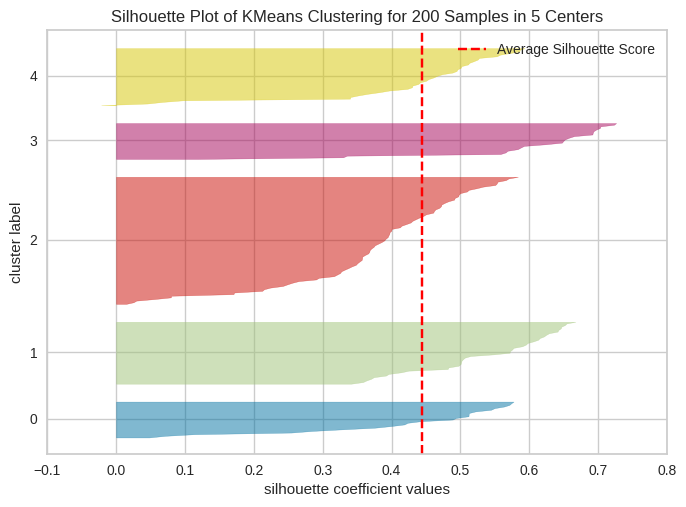

In [64]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(n_clusters=5, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

## 6 Clusters:

In [65]:
KM_6_clusters = KMeans(n_clusters=6, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM6_clustered = X_numerics.copy()
KM6_clustered.loc[:,'Cluster'] = KM_6_clusters.labels_ # append labels to points


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



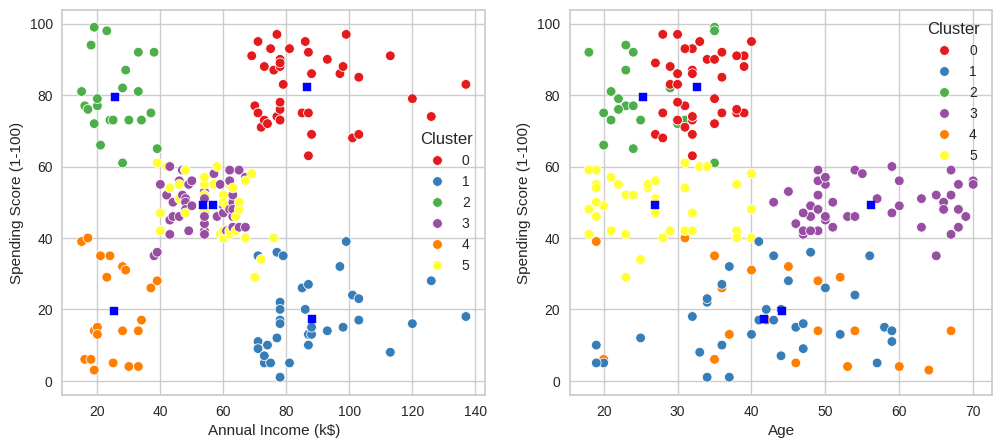

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig11, axes = plt.subplots(1, 2, figsize=(12, 5))

# First scatter plot with 'Annual Income (k$)' vs 'Spending Score (1-100)'
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=KM6_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

# Second scatter plot with 'Age' vs 'Spending Score (1-100)'
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=KM6_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

# Plotting centroids on the first subplot
axes[0].scatter(KM_6_clusters.cluster_centers_[:, 1], KM_6_clusters.cluster_centers_[:, 2],
                marker='s', s=40, c="blue")

# Plotting centroids on the second subplot
axes[1].scatter(KM_6_clusters.cluster_centers_[:, 0], KM_6_clusters.cluster_centers_[:, 2],
                marker='s', s=40, c="blue")

# Show the plot
plt.show()


K-Means algorithm generated the following 6 clusters:

- younger clients with **medium** annual and **medium** spending score
- clients with **high** annual income and **low** spending score
- younger clients with **medium** annual and **medium** spending score
- clients with **high** annual income and **high** spending score
- clients with **low** annual income and **low** spending score
- clients with **low** annual income and **high** spending score

There are no distinct groups is terms of customers age.

In [67]:
KM6_clust_sizes = KM6_clustered.groupby('Cluster').size().to_frame()
KM6_clust_sizes.columns = ["KM_size"]
KM6_clust_sizes

,KM_size
Cluster,
0,39
1,35
2,22
3,45
4,21
5,38


In [68]:
# Plotly interactive 3D plot

trace0 = tracer(KM6_clustered, 0, 'Cluster 0')
trace1 = tracer(KM6_clustered, 1, 'Cluster 1')
trace2 = tracer(KM6_clustered, 2, 'Cluster 2')
trace3 = tracer(KM6_clustered, 3, 'Cluster 3')
trace4 = tracer(KM6_clustered, 4, 'Cluster 4')
trace5 = tracer(KM6_clustered, 5, 'Cluster 5')

data = [trace0, trace1, trace2, trace3, trace4, trace5]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



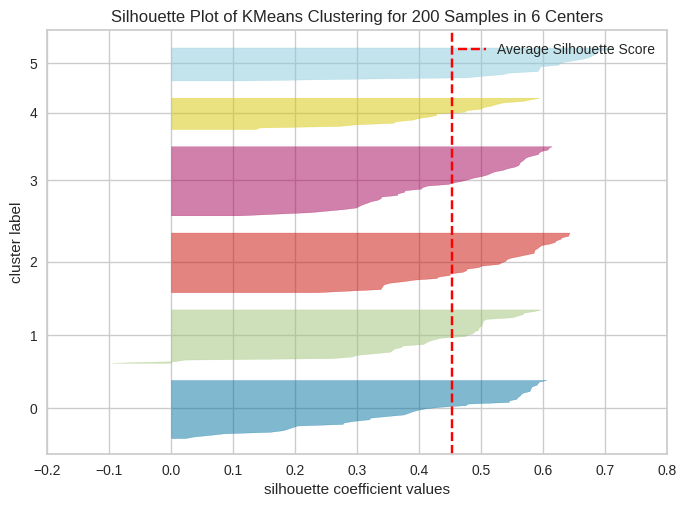

In [69]:
model = KMeans(n_clusters=6, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

## DBSCAN:

Density-Based Spatial Clustering of Applications with Noise

The assumption is that natural clusters are composed of densely located points. This requires definition of “dense region”. To do these two parameters are required for DBSCAN algorithm.

- Eps, ε - distance
- MinPts – Minimum number of points within distance Eps

Advantages of this approach:

- It finds number of clusters itself, based on eps and MinPts parameters
- It is able to differentiate elongated clusters or clusters surrounded by other clusters in contrary to e.g. K-Means where clusters are always convex.
- It is also able to find points not fitting into any cluster – it detects outliers.

Disadvantages:

- High computational expense of average O(n log(n)) coming from a need to execute a neighbourhood query for each point.
- Poorly identifies clusters with various densities.

In [70]:
from sklearn.cluster import DBSCAN
from itertools import product

eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))

DBSCAN_params

[(8.0, 3),
 (8.0, 4),
 (8.0, 5),
 (8.0, 6),
 (8.0, 7),
 (8.0, 8),
 (8.0, 9),
 (8.25, 3),
 (8.25, 4),
 (8.25, 5),
 (8.25, 6),
 (8.25, 7),
 (8.25, 8),
 (8.25, 9),
 (8.5, 3),
 (8.5, 4),
 (8.5, 5),
 (8.5, 6),
 (8.5, 7),
 (8.5, 8),
 (8.5, 9),
 (8.75, 3),
 (8.75, 4),
 (8.75, 5),
 (8.75, 6),
 (8.75, 7),
 (8.75, 8),
 (8.75, 9),
 (9.0, 3),
 (9.0, 4),
 (9.0, 5),
 (9.0, 6),
 (9.0, 7),
 (9.0, 8),
 (9.0, 9),
 (9.25, 3),
 (9.25, 4),
 (9.25, 5),
 (9.25, 6),
 (9.25, 7),
 (9.25, 8),
 (9.25, 9),
 (9.5, 3),
 (9.5, 4),
 (9.5, 5),
 (9.5, 6),
 (9.5, 7),
 (9.5, 8),
 (9.5, 9),
 (9.75, 3),
 (9.75, 4),
 (9.75, 5),
 (9.75, 6),
 (9.75, 7),
 (9.75, 8),
 (9.75, 9),
 (10.0, 3),
 (10.0, 4),
 (10.0, 5),
 (10.0, 6),
 (10.0, 7),
 (10.0, 8),
 (10.0, 9),
 (10.25, 3),
 (10.25, 4),
 (10.25, 5),
 (10.25, 6),
 (10.25, 7),
 (10.25, 8),
 (10.25, 9),
 (10.5, 3),
 (10.5, 4),
 (10.5, 5),
 (10.5, 6),
 (10.5, 7),
 (10.5, 8),
 (10.5, 9),
 (10.75, 3),
 (10.75, 4),
 (10.75, 5),
 (10.75, 6),
 (10.75, 7),
 (10.75, 8),
 (10.75, 9),
 (11.0

In [71]:
from sklearn.metrics import silhouette_score

no_of_clusters = [] ## number of clusters for each parameter combination (eps,min_samples)
sil_score = [] ## silhoutte scores for each parameter combination (eps,min_samples)

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numerics)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_numerics, DBS_clustering.labels_))

In [72]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters
tmp.head(5)

,Eps,Min_samples,No_of_clusters
0,8.0,3,17
1,8.0,4,10
2,8.0,5,7
3,8.0,6,8
4,8.0,7,6


In [73]:
## min_samples as index, eps as columns and number of clusters as values
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')
pivot_1

Eps,8.00,8.25,8.50,8.75,9.00,9.25,9.50,9.75,10.00,10.25,10.50,10.75,11.00,11.25,11.50,11.75,12.00,12.25,12.50
Min_samples,,,,,,,,,,,,,,,,,,,
3,17.0,14.0,13.0,12.0,12.0,13.0,11.0,11.0,11.0,11.0,11.0,12.0,10.0,8.0,8.0,7.0,7.0,6.0,4.0
4,10.0,11.0,10.0,8.0,8.0,8.0,8.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,6.0,6.0
5,7.0,8.0,8.0,6.0,6.0,6.0,7.0,6.0,5.0,6.0,6.0,6.0,6.0,7.0,7.0,6.0,6.0,5.0,5.0
6,8.0,8.0,8.0,7.0,7.0,7.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0
7,6.0,7.0,7.0,6.0,6.0,7.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0,5.0,5.0,4.0
8,5.0,5.0,6.0,6.0,6.0,7.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0,4.0
9,4.0,4.0,4.0,4.0,5.0,7.0,6.0,6.0,6.0,6.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0


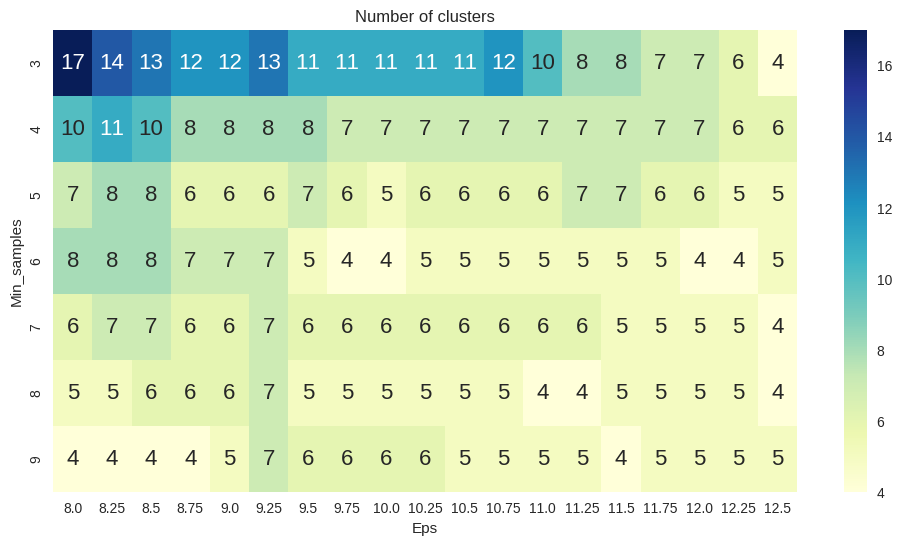

In [74]:
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

The heatplot above shows, the number of clusters vary from 17 to 4. However, most of the combinations gives 4-7 clusters. To decide which combination to choose I will use a metric - a silhuette score and I will plot it as a heatmap again.

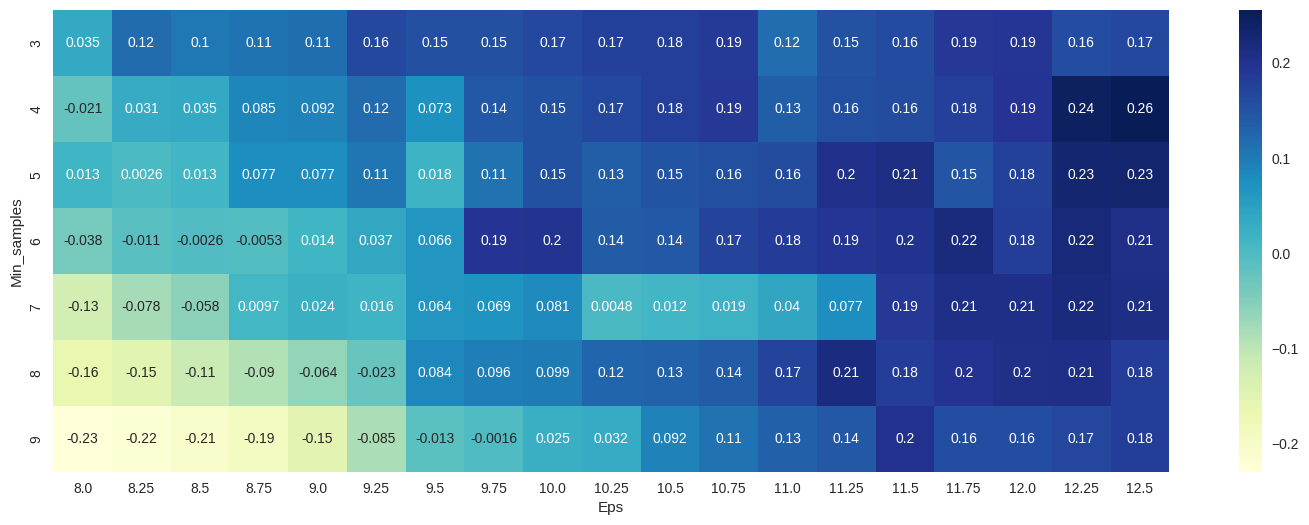

In [75]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

Global maximum is 0.26 for eps=12.5 and min_samples=4.

In [76]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_numerics)

DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points
DBSCAN_clustered

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,0
1,21,15,81,0
2,20,16,6,-1
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,-1
196,45,126,28,-1
197,32,126,74,-1
198,32,137,18,-1


In [77]:
np.unique(DBSCAN_clustered.Cluster)

array([-1,  0,  1,  2,  3,  4])

We have 5 clusters amnd one outlier=-1 for min_sample=4 and eps=12.5.

Checking sizes of clusters ( number of data points in each cluster ).

In [78]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


DBSCAN created 5 clusters plus outliers cluster (-1). Sizes of clusters 0-4 vary significantly - some have only 4 or 8 observations. There are 18 outliers.

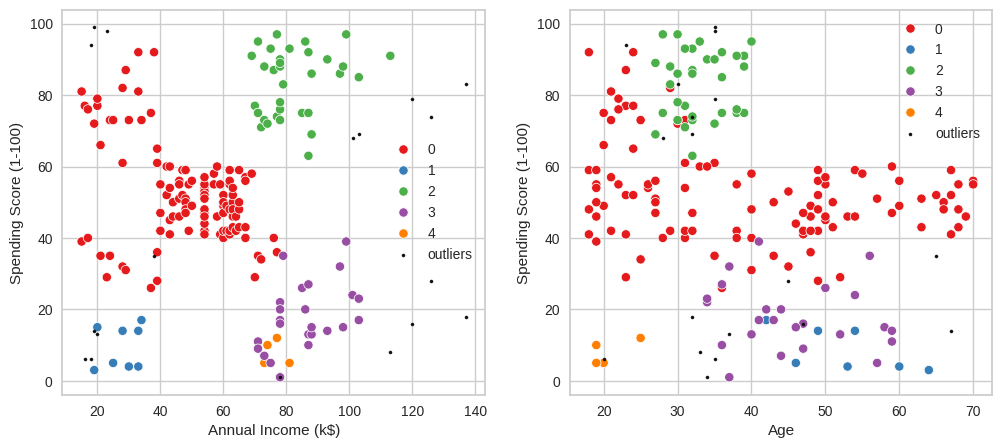

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identifying outliers
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster'] == -1]

# Create subplots
fig2, axes = plt.subplots(1, 2, figsize=(12, 5))

# First scatter plot: 'Annual Income (k$)' vs 'Spending Score (1-100)'
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster'] != -1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

# Second scatter plot: 'Age' vs 'Spending Score (1-100)'
sns.scatterplot(x='Age', y='Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster'] != -1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

# Plotting outliers on the first subplot
axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'],
                s=5, label='outliers', c="k")

# Plotting outliers on the second subplot
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'],
                s=5, label='outliers', c="k")

# Adding legends
axes[0].legend()
axes[1].legend()

# Adjust legend font size
plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

# Show the plot
plt.show()


The graph above shows that there are some outliers - these points do not meet distance and minimum samples requirements to be recognised as a cluster.

## Affinity Propagation:
This chapter describes how Affinity Propagation works and shows its implementation to the mall customers segmentation.

It is built around the concept of sending messages between a pair of points until it converges. These messages are a way of measuring how similar these two points are to each other and can they be exemplars of each other. The algorithm finds an optimum number of clusters itself. This also implies very high time complexity cost of the order O(n²T) where n is the number of samples and T is the number of iterations until convergence. However, a big advantage of AP is the lack of sensitivity to the initialisation criteria.

The user is required to specify two parameters:

- Preference which is a negative number and controls how many exemplars are used.
- Damping factor which prevents numerical oscillations when updating messages.


In [80]:
from sklearn.cluster import AffinityPropagation
no_of_clusters = []
preferences = range(-20000,-5000,100) # arbitraty chosen range
af_sil_score = [] # silouette scores

for p in preferences:
    AF = AffinityPropagation(preference=p, max_iter=200).fit(X_numerics)
    no_of_clusters.append((len(np.unique(AF.labels_))))
    af_sil_score.append(silhouette_score(X_numerics, AF.labels_))

af_results = pd.DataFrame([preferences, no_of_clusters, af_sil_score], index=['preference','clusters', 'sil_score']).T
af_results.sort_values(by='sil_score', ascending=False).head() # display only 5 best scores

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning:

Affinity propagation did not converge, this model may return degenerate cluster centers and labels.



,preference,clusters,sil_score
82,-11800.0,6.0,0.451649
27,-17300.0,6.0,0.451491
51,-14900.0,6.0,0.451491
52,-14800.0,6.0,0.451440
28,-17200.0,6.0,0.451440


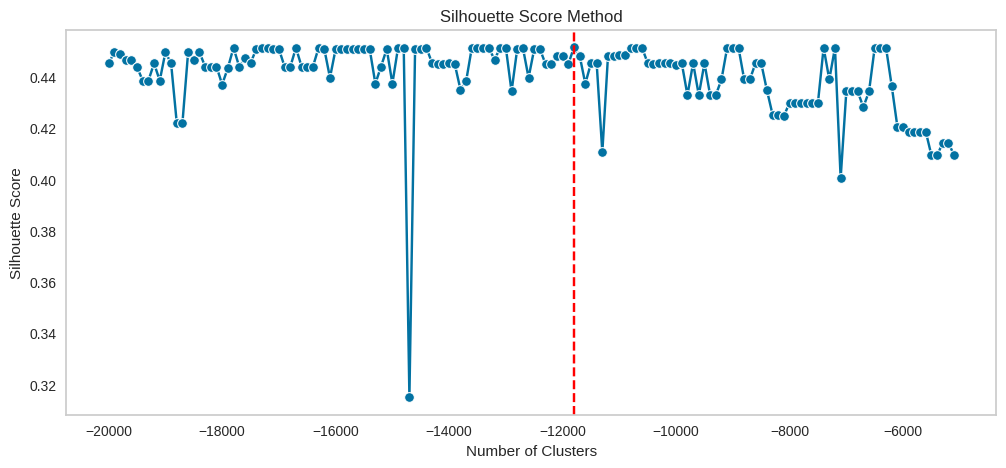

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot
fig, ax = plt.subplots(figsize=(12, 5))
ax = sns.lineplot(x=preferences, y=af_sil_score, marker='o', ax=ax)

# Set the title and labels
ax.set_title("Silhouette Score Method")
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Silhouette Score")

# Add a vertical line
ax.axvline(-11800, ls="--", c="red")

# Show grid
plt.grid()

# Display the plot
plt.show()


In [82]:
AF = AffinityPropagation(preference=-11800).fit(X_numerics)
AF_clustered = X_numerics.copy()
AF_clustered.loc[:,'Cluster'] = AF.labels_ # append labels to points

In [83]:
AF_clust_sizes = AF_clustered.groupby('Cluster').size().to_frame()
AF_clust_sizes.columns = ["AF_size"]
AF_clust_sizes

,AF_size
Cluster,
0,22
1,22
2,44
3,39
4,34
5,39


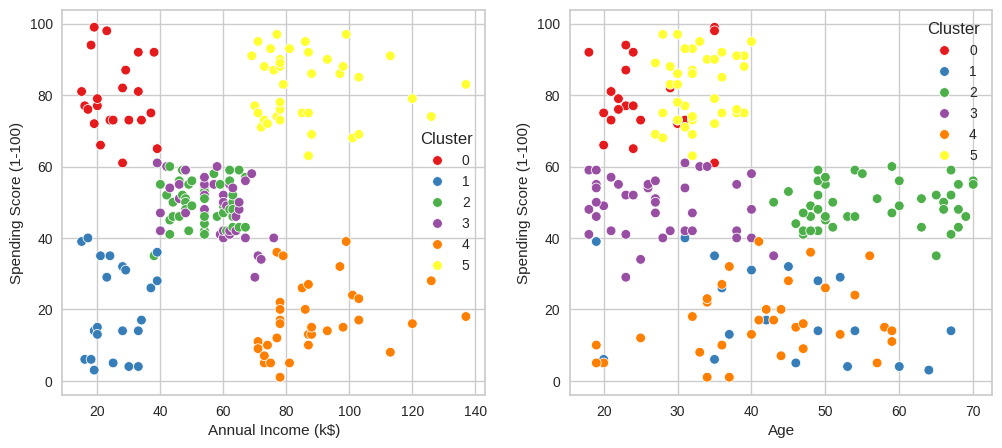

In [84]:
fig3, (ax_af) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)', data=AF_clustered,
                hue='Cluster', ax=ax_af[0], palette='Set1', legend='full')

sns.scatterplot(x='Age',y='Spending Score (1-100)', data=AF_clustered,
                hue='Cluster', palette='Set1', ax=ax_af[1], legend='full')

plt.setp(ax_af[0].get_legend().get_texts(), fontsize='10')
plt.setp(ax_af[1].get_legend().get_texts(), fontsize='10')
plt.show()

Clusters generated by the Affinity Propagation algorithm created relatively even-sized clusters similar to ones created by K-Means.

## Comparison and discussion ^
In this chapter clusters genereated by 3 investigated algorithms will be compared and discussed.

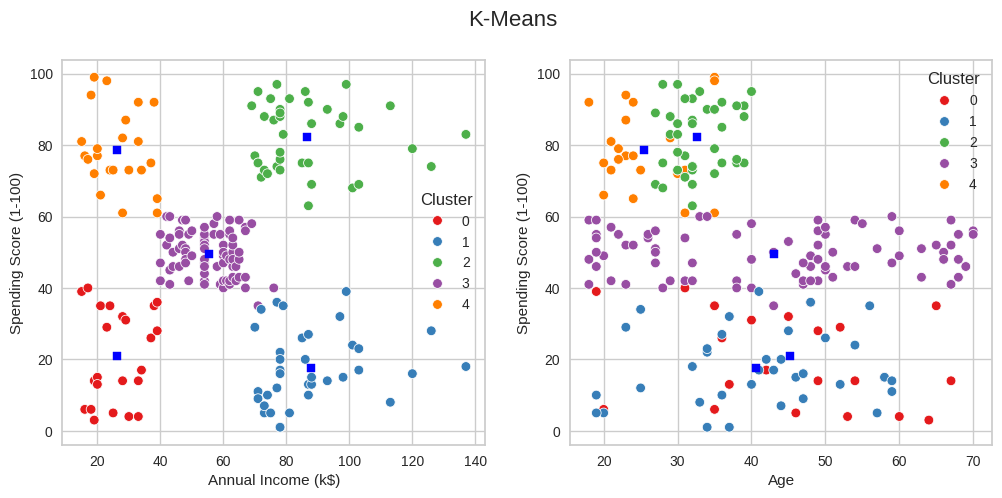

In [85]:
fig1.suptitle('K-Means', fontsize=16)
fig1

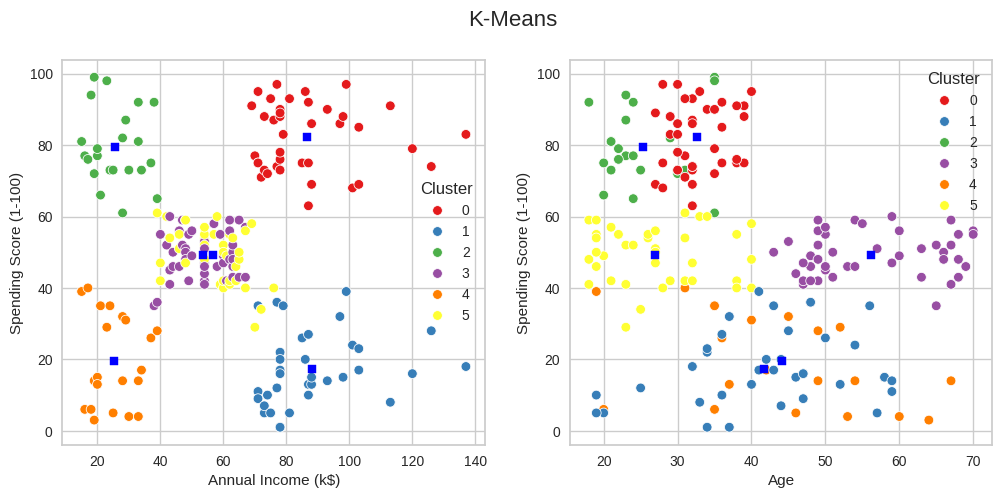

In [86]:
fig11.suptitle('K-Means', fontsize=16)
fig11

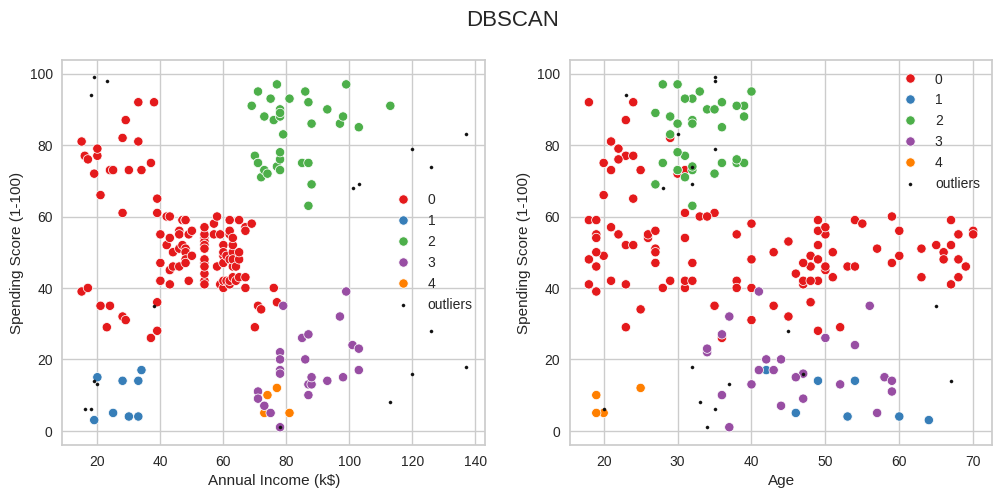

In [87]:
fig2.suptitle('DBSCAN', fontsize=16)
fig2

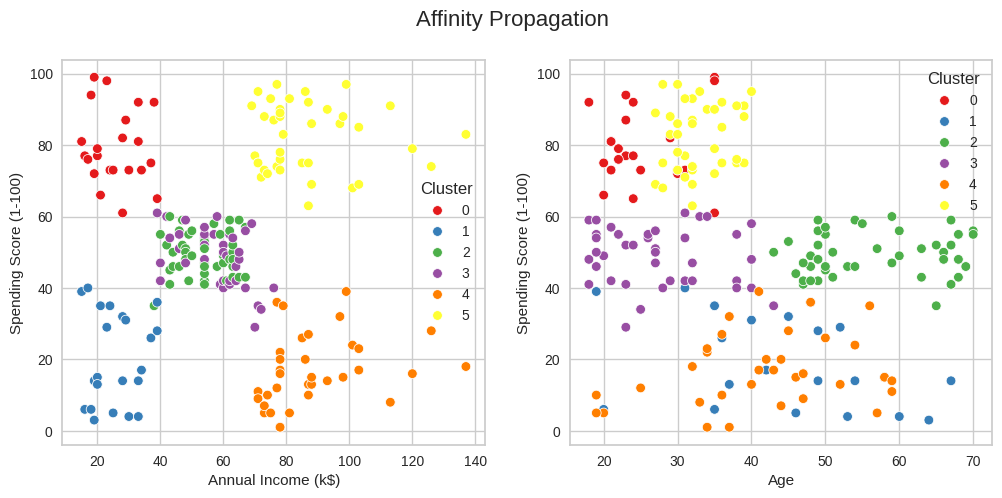

In [88]:
fig3.suptitle('Affinity Propagation', fontsize=16)
fig3

A table below shows sizes of created clusters. Please note that numbering of clusters is different in each method, e.g. cluster no.0 in K-Means is equivalent of cluster no.2 in DBSCAN and no.2 in Affinity Propagation.

cluster = -1 are for outliers

In [90]:
clusters = pd.concat([KM6_clust_sizes, DBSCAN_clust_sizes, AF_clust_sizes],axis=1, sort=True)
clusters

,KM_size,DBSCAN_size,AF_size
Cluster,,,
-1,NaN,18.0,NaN
0,39.0,112.0,22.0
1,35.0,8.0,22.0
2,22.0,34.0,44.0
3,45.0,24.0,39.0
4,21.0,4.0,34.0
5,38.0,NaN,39.0


From the above comparisons, it is clear that DBSCAN failed to generate reasonable clusters. It is most likely because DBCSAN tries to find clusters based on the density of points. If one of our clusters is less dense than others DBSCAN will produce suboptimal results by not recognising the least dense group as a cluster.

In turn, K-Means and Affinity Propagation algorithms created reasonable 6 clusters.